<a href="https://colab.research.google.com/github/anuragiitpcs/CSET340/blob/main/rachit_lab09_acv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RACHIT TAYAL E22CSEU0118

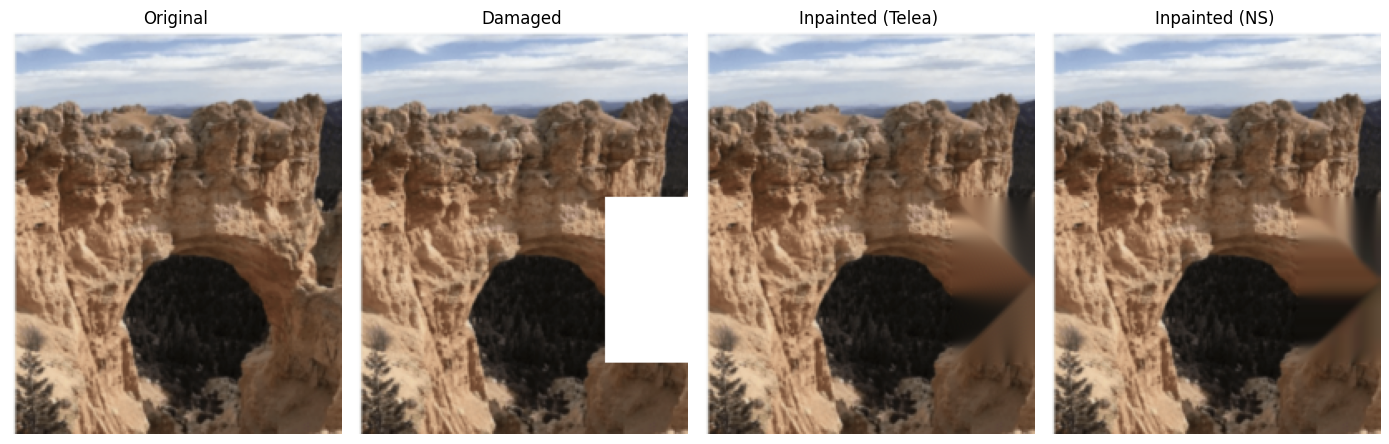

In [ ]:
# i) Image Inpainting


import cv2
import numpy as np
import matplotlib.pyplot as plt


img_path = "/content/Screenshot 2025-04-29 094441.png"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# damage by drawing white boxes
mask = np.zeros(image.shape[:2], np.uint8)
mask[100:200, 150:300] = 255
mask[250:300, 100:180] = 255

damaged = image.copy()
damaged[mask == 255] = 255  # Draw white on mask area

# Inpainting using OpenCV
inpainted_telea = cv2.inpaint(damaged, mask, 3, cv2.INPAINT_TELEA)
inpainted_ns = cv2.inpaint(damaged, mask, 3, cv2.INPAINT_NS)


plt.figure(figsize=(14, 6))
titles = ["Original", "Damaged", "Inpainted (Telea)", "Inpainted (NS)"]
images = [image, damaged, inpainted_telea, inpainted_ns]

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

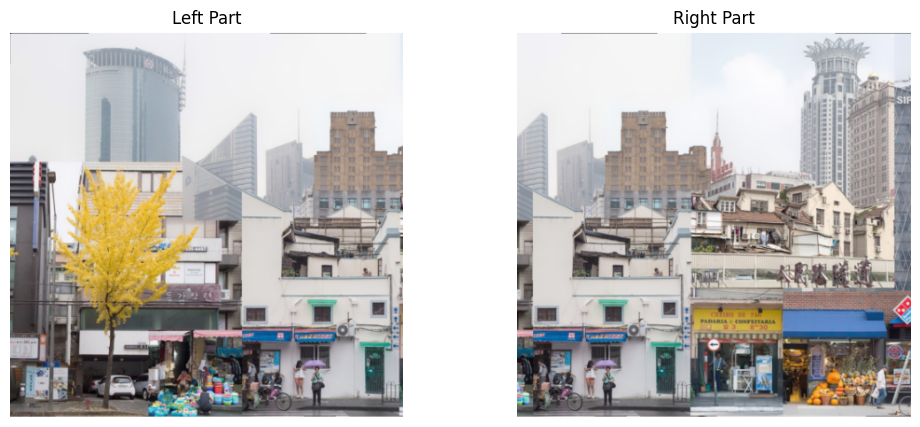

Image stitching successful!


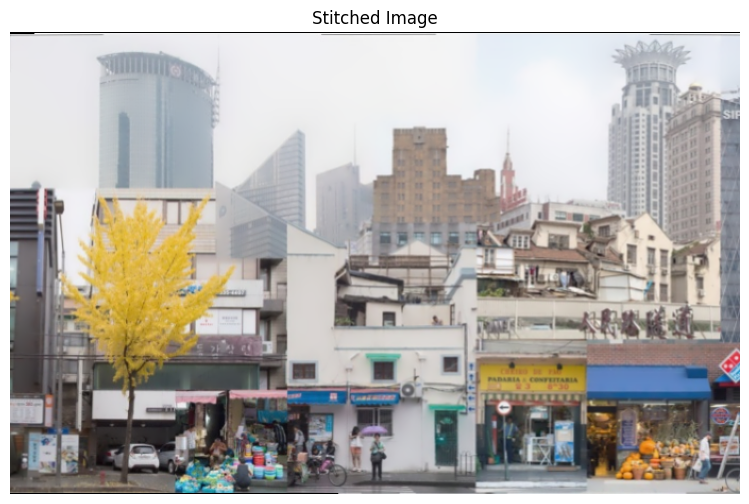

In [ ]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('/content/Screenshot 2025-04-29 094557.png')

# overlap
height, width, _ = img.shape
overlap = 100  # pixels

# left and right images with overlap
left_img = img[:, :width//2 + overlap]
right_img = img[:, width//2 - overlap:]

# Save for stitching
cv2.imwrite("left_part.jpg", left_img)
cv2.imwrite("right_part.jpg", right_img)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB))
plt.title("Left Part")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB))
plt.title("Right Part")
plt.axis('off')
plt.show()

# Stitching two parts back together

left_img = cv2.imread("left_part.jpg")
right_img = cv2.imread("right_part.jpg")


stitcher = cv2.Stitcher_create()
status, stitched = stitcher.stitch([left_img, right_img])


if status == cv2.Stitcher_OK:
    print("Image stitching successful!")
    stitched_rgb = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 6))
    plt.imshow(stitched_rgb)
    plt.axis('off')
    plt.title("Stitched Image")
    plt.show()
else:
    print("Image stitching failed. Status code:", status)

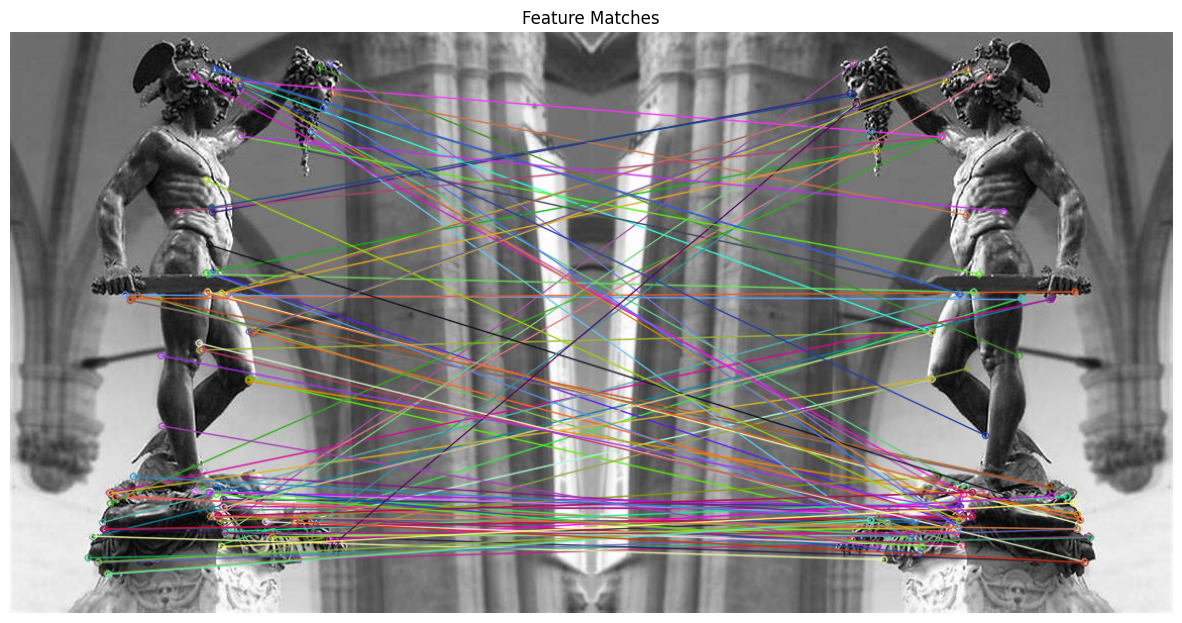

Fundamental Matrix:
 [[-9.41322134e-06  1.29013920e-04 -5.59069245e-02]
 [-1.31169259e-04 -2.72898512e-05  4.02193044e-02]
 [ 6.70331983e-02 -3.40686513e-02  1.00000000e+00]]
Essential Matrix:
 [[ 0.20703055  0.62424446 -0.15742551]
 [ 0.5667626  -0.01598364  0.32015746]
 [-0.18381045  0.21597239 -0.1956219 ]]
Rotation:
 [[-0.93334651  0.24288312 -0.2643333 ]
 [ 0.35597153  0.72129523 -0.59415273]
 [ 0.04635268 -0.6486455  -0.75967786]]
Translation:
 [[-0.2921452 ]
 [ 0.389933  ]
 [ 0.87327168]]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load grayscale images
img1 = cv2.imread('/content/OIP (1)  .jpeg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/OIP (1).jpeg', cv2.IMREAD_GRAYSCALE)

# Detect ORB features and compute descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Match features using Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)[:100]  # take best 100 matches

# Draw matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=2)
plt.figure(figsize=(15, 8))
plt.title("Feature Matches")
plt.imshow(img_matches)
plt.axis("off")
plt.show()

# Extract matched keypoints
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Compute Fundamental Matrix
F, mask_f = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)
print("Fundamental Matrix:\n", F)

# Intrinsic camera matrix (example values - replace with calibrated ones)
K = np.array([[718.8560, 0, 607.1928],
              [0, 718.8560, 185.2157],
              [0, 0, 1]])

# Compute Essential Matrix
E, mask_e = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC, threshold=1.0)
print("Essential Matrix:\n", E)

# Recover pose
_, R, t, mask_pose = cv2.recoverPose(E, pts1, pts2, K)
print("Rotation:\n", R)
print("Translation:\n", t)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 132s 275ms/step - loss: 0.1173 - val_loss: 0.1140
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 135s 262ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 156s 292ms/step - loss: 0.1116 - val_loss: 0.1140
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 131s 269ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 128s 273ms/step - loss: 0.1119 - val_loss: 0.1140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


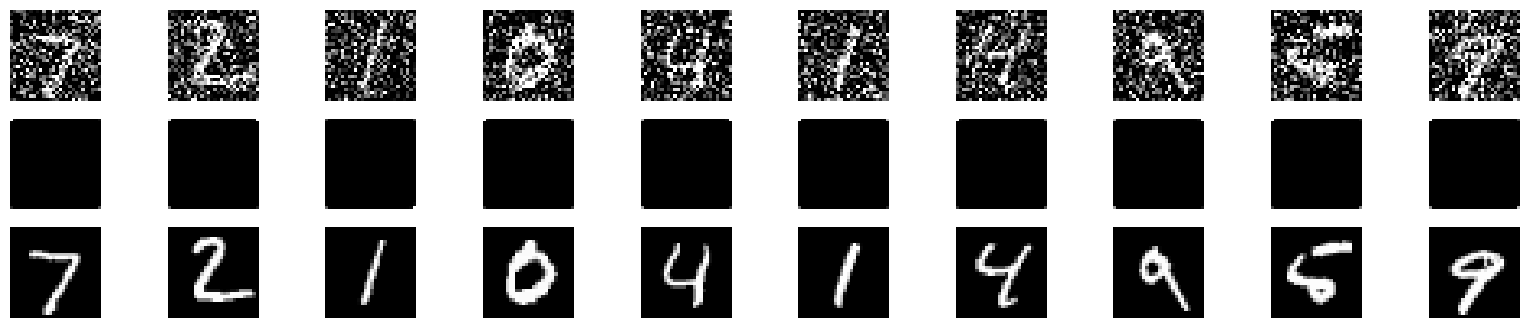

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train_noisy, x_train, epochs=5, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoencoder.predict(x_test_noisy[:10])

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()


In [ ]:
# GAN for MNIST digits generation
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 127.5 - 1.
x_train = np.expand_dims(x_train, axis=-1)

def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(7*7*256, input_shape=(100,)),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, 5, strides=1, padding='same', activation='relu'),
        layers.Conv2DTranspose(64, 5, strides=2, padding='same', activation='relu'),
        layers.Conv2DTranspose(1, 5, strides=2, padding='same', activation='tanh')
    ])
    return model

def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, 5, strides=2, padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(0.2),
        layers.Conv2D(128, 5, strides=2, padding='same'),
        layers.LeakyReLU(0.2),
        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real, fake):
    return cross_entropy(tf.ones_like(real), real) + cross_entropy(tf.zeros_like(fake), fake)

def generator_loss(fake):
    return cross_entropy(tf.ones_like(fake), fake)

generator = build_generator()
discriminator = build_discriminator()
gen_opt = tf.keras.optimizers.Adam(1e-4)
disc_opt = tf.keras.optimizers.Adam(1e-4)

@tf.function
def train_step(images):
    noise = tf.random.normal([64, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_imgs = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(gen_imgs, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    gradients_of_gen = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_disc = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    gen_opt.apply_gradients(zip(gradients_of_gen, generator.trainable_variables))
    disc_opt.apply_gradients(zip(gradients_of_disc, discriminator.trainable_variables))

for epoch in range(50):
    for batch in x_train[:10000].reshape(-1, 64, 28, 28):
        train_step(batch)

noise = tf.random.normal([10, 100])
gen_imgs = generator(noise, training=False)
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(gen_imgs[i, :, :, 0]*127.5 + 127.5, cmap='gray')
    plt.axis("off")
plt.show()


In [ ]:
!pip install opendatasets tensorflow matplotlib

import opendatasets as od
od.download('https://www.kaggle.com/datasets/devdgohil/the-oxfordiiit-pet-dataset')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rachittayal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/devdgohil/the-oxfordiiit-pet-dataset


In [ ]:
# UNET - Image Segmentation
!pip install -q tensorflow_datasets

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load Oxford-IIIT Pet Dataset
dataset, info = tfds.load('oxford_iiit_pet', with_info=True)  # auto-gets latest

def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

def load_image(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))
    return normalize(input_image, input_mask)

# Prepare data
train = dataset['train'].map(load_image).cache().shuffle(1000).batch(16)
test = dataset['test'].map(load_image).batch(16)

# U-Net Model
def unet_model():
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])

    c1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(c4)

    # Decoder
    u5 = tf.keras.layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(c4)
    u5 = tf.keras.layers.concatenate([u5, c3])
    c5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(u5)
    c5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(c5)

    u6 = tf.keras.layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c2])
    c6 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(u6)
    c6 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c1])
    c7 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(u7)
    c7 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(c7)

    outputs = tf.keras.layers.Conv2D(3, 1, activation='softmax')(c7)
    return tf.keras.Model(inputs=inputs, outputs=outputs)

model = unet_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train, epochs=5, validation_data=test)
